<a href="https://colab.research.google.com/github/Mayra071/Chai_Adda/blob/main/Car_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [5]:
df=pd.read_csv('predicted_data.csv')

In [6]:
df.columns

Index(['Variant', 'Ex-Showroom_Price', 'Displacement', 'Cylinders',
       'Fuel_Tank_Capacity', 'Height', 'Length', 'Width', 'Doors', 'Gears',
       'Ground_Clearance', 'Power', 'Odometer', 'Speedometer', 'Tachometer',
       'Tripmeter', 'Seating_Capacity', 'Type', 'Boot_Space',
       'Child_Safety_Locks', 'Clock', 'Distance_to_Empty',
       'Minimum_Turning_Radius', 'Gear_Indicator',
       'ABS_(Anti-lock_Braking_System)', 'Number_of_Airbags',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'milage', 'Torque_Extracted', 'F_Type', 'Brand_Audi', 'Brand_Bmw',
       'Brand_Datsun', 'Brand_Dc', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Go', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Icml', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia', 'Brand_Land', 'Brand_Lexus',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Mg',
       'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Br

In [7]:
df.head(4)

,Variant,Ex-Showroom_Price,Displacement,Cylinders,Fuel_Tank_Capacity,Height,Length,Width,Doors,Gears,...,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,B_Type
0,660,618015,1198,3.0,35.0,1507,3788,1636.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,4
1,566,610000,1199,3.0,35.0,1535,3746,1647.0,5.0,5.0,...,0,0,0,0,0,1,0,0,0,4
2,567,620000,1199,3.0,35.0,1535,3746,1647.0,5.0,5.0,...,0,0,0,0,0,1,0,0,0,4
3,568,649000,1199,3.0,35.0,1535,3746,1647.0,5.0,5.0,...,0,0,0,0,0,1,0,0,0,4


In [8]:
# normalize
x=df.drop('Ex-Showroom_Price',axis=1)
y=df['Ex-Showroom_Price']

# Select only numerical columns for normalization
numerical_cols = x.select_dtypes(include=np.number).columns

for i in numerical_cols:
    x[i]=(x[i]-x[i].min())/(x[i].max()-x[i].min())

# Fill any potential NaN values in x and y after normalization
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Normalize the target variable y as well
y=(y-y.min())/(y.max()-y.min())

In [9]:
x.head(20)

,Variant,Displacement,Cylinders,Fuel_Tank_Capacity,Height,Length,Width,Doors,Gears,Ground_Clearance,...,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,B_Type
0,0.791367,0.230785,0.0,0.041096,0.726001,0.705126,0.736700,1.0,0.2,0.201005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
1,0.678657,0.230990,0.0,0.041096,0.739508,0.697297,0.741659,1.0,0.2,0.175879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.285714
2,0.679856,0.230990,0.0,0.041096,0.739508,0.697297,0.741659,1.0,0.2,0.175879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.285714
3,0.681055,0.230990,0.0,0.041096,0.739508,0.697297,0.741659,1.0,0.2,0.175879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.285714
4,0.682254,0.230990,0.0,0.041096,0.739508,0.697297,0.741659,1.0,0.2,0.175879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.285714
5,0.377698,0.230580,0.2,0.000000,0.768452,0.688723,0.761046,1.0,0.2,0.201005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
6,0.378897,0.230580,0.2,0.000000,0.768452,0.688723,0.761046,1.0,0.2,0.201005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
7,0.450839,0.230580,0.2,0.000000,0.768452,0.688723,0.761046,1.0,0.2,0.201005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
8,0.988010,0.230580,0.2,0.000000,0.768452,0.688723,0.761046,1.0,0.2,0.201005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
9,0.689448,0.189998,0.0,0.109589,0.791606,0.742777,0.783138,1.0,0.2,0.206030,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.428571


In [10]:
y.head(4)

,Ex-Showroom_Price
0,0.001615
1,0.000753
2,0.001829
3,0.004948


In [11]:
df.isna()

,Variant,Ex-Showroom_Price,Displacement,Cylinders,Fuel_Tank_Capacity,Height,Length,Width,Doors,Gears,...,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,B_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape

(769, 64)

In [14]:
# train and text ANN

model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)                                           # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

history=model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1520 - mae: 0.1520 - val_loss: 0.0843 - val_mae: 0.0843
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mae: 0.0742 - val_loss: 0.0592 - val_mae: 0.0592
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0620 - mae: 0.0620 - val_loss: 0.0524 - val_mae: 0.0524
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0539 - mae: 0.0539 - val_loss: 0.0497 - val_mae: 0.0497
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0501 - mae: 0.0501 - val_loss: 0.0457 - val_mae: 0.0457
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0415 - mae: 0.0415 - val_loss: 0.0429 - val_mae: 0.0429
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0384 - mae: 0.0384 - val_loss: 0.0470 - val_mae: 0.0470
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0415 - mae: 0.0415 - val_loss: 0.0424 - val_mae: 0.0424
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mae: 0.

In [15]:
y_test[:5]

,Ex-Showroom_Price
344,0.023246
381,0.075173
351,0.028153
778,0.547704
277,0.010971


In [16]:
y_train[:5]

,Ex-Showroom_Price
468,0.088277
857,0.072817
549,0.163698
280,0.034635
109,0.021147


In [17]:
# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - mae: 0.0267 
Test Loss: 0.027735747396945953, Test MAE: 0.027735747396945953


In [18]:
# Evaluate r2 score
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)*100
print(f"Test R-squared: {r2}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test R-squared: 94.89472194435407


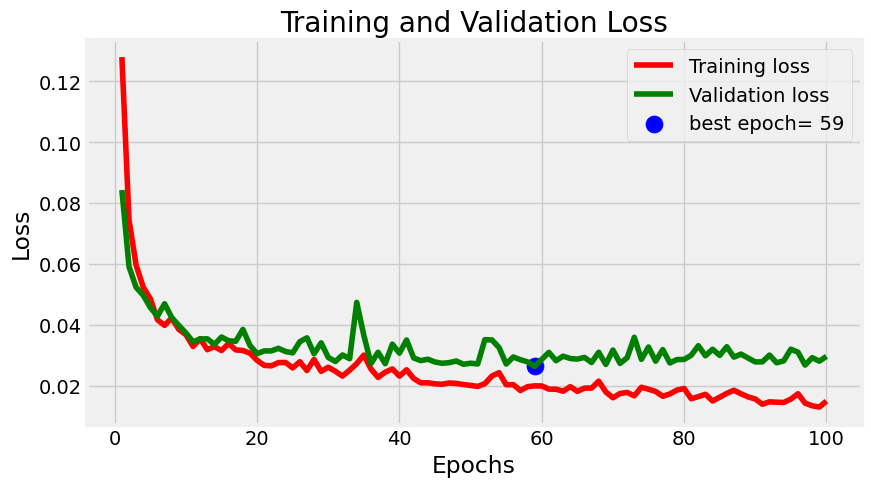

In [19]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (10, 5))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()